In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df=df.drop(columns=['Unnamed: 0'])

In [8]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')


In [9]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [10]:
df['Ram']=df['Ram'].astype(int)
df['Weight']=df['Weight'].astype(float)

In [11]:
import seaborn as sns

C:\Users\Aryaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

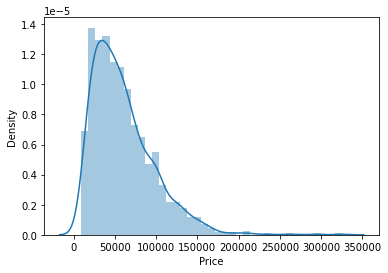

In [12]:
######## Depicts the density of laptops in different ranges of price
sns.distplot(df['Price'])

<AxesSubplot:>

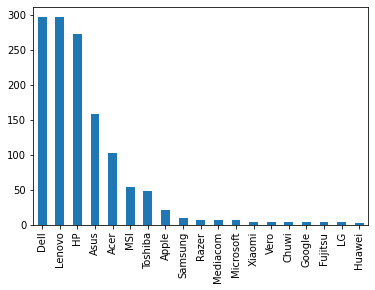

In [13]:
###### Shows the no of laptops in the dataset of diff companies
df['Company'].value_counts().plot(kind='bar')

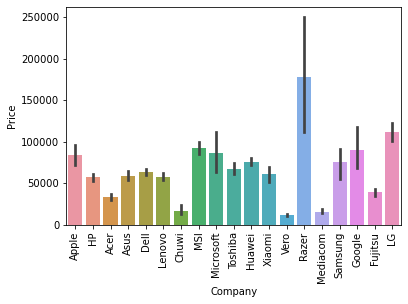

In [14]:
######## Displays mean price of all the companies
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

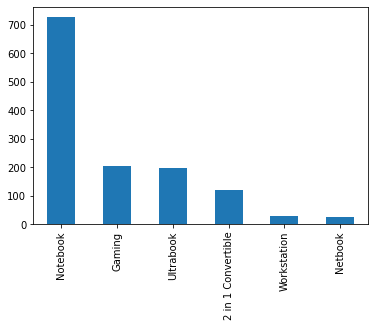

In [15]:
###### Shows the no of laptops in the dataset of diff Typenames
df['TypeName'].value_counts().plot(kind='bar')

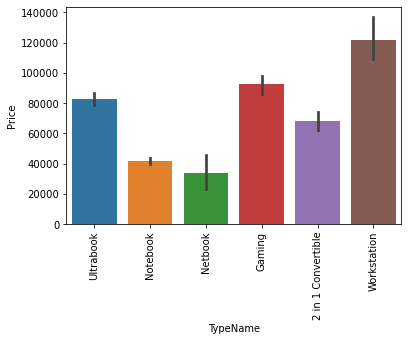

In [16]:
######## Displays mean price of all the laptops of diff typenames
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

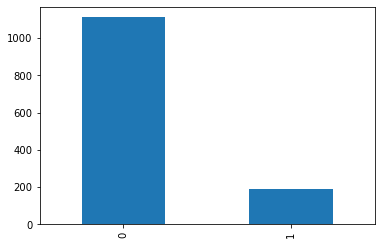

In [19]:
df['TouchScreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

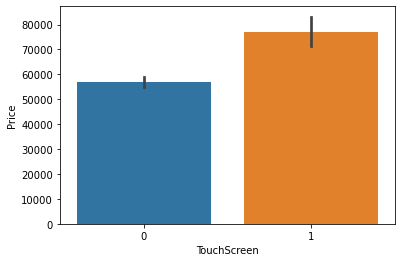

In [20]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [21]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [22]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1


In [23]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [24]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [25]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080


In [26]:
def take_only_num(x_res):
    L = ""
    for i in x_res:
        if i.isnumeric()==True:
            L += i
    if len(L)>4:
        L = int(L)//10
    return str(L)

In [27]:
df['X_res'] = df['X_res'].apply(take_only_num)

In [28]:
df['X_res'] = df['X_res'].astype(int)

In [29]:
df['Y_res'] = df['Y_res'].astype(int)

In [30]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.542357
Y_res          0.552809
Name: Price, dtype: float64

In [31]:
df['ppi'] = ((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']

In [32]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [33]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [34]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005


In [35]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [36]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [37]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [38]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [39]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

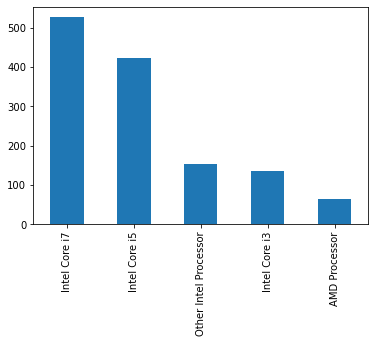

In [40]:
df['Cpu Brand'].value_counts().plot(kind='bar')

In [41]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [42]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split("+",n=1,expand=True)

df['First'] = new[0]
df['First'] = df['First'].str.strip()

df['Second'] = new[1]

df['Layer1HDD'] = df['First'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer1SSD'] = df['First'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['First'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['First'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['First'] = df['First'].str.replace(r'\D', '')

df['Second'].fillna("0", inplace = True)

df['Layer2HDD'] = df['Second'].apply(lambda x:1 if "HDD" in x else 0)
df['Layer2SSD'] = df['Second'].apply(lambda x:1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['Second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['Second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['Second'] = df['Second'].str.replace(r'\D', '')

df['First'] = df['First'].astype(int)
df['Second'] = df['Second'].astype(int)

df['HDD'] = (df['First']*df['Layer1HDD']+df['Second']*df['Layer2HDD'])
df['SSD'] = (df['First']*df['Layer1SSD']+df['Second']*df['Layer2SSD'])
df['Hybrid'] = (df['First']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['First']*df['Layer1Flash_Storage']+df['Second']*df['Layer2Flash_Storage'])

df.drop(columns=['First','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)


C:\Users\Aryaman\AppData\Local\Temp/ipykernel_36884/2032583771.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['First'] = df['First'].str.replace(r'\D', '')
C:\Users\Aryaman\AppData\Local\Temp/ipykernel_36884/2032583771.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D', '')


In [43]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0


In [44]:
df.drop(columns=['Memory'],inplace=True) 

In [45]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.474641
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [46]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [47]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128


In [48]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [49]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [50]:
df = df[df['Gpu Brand']!='ARM']

In [51]:
df.drop(columns=['Gpu'],inplace=True)

In [52]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

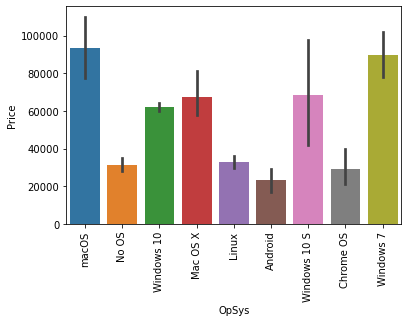

In [53]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'MacOS'
    elif inp == 'Linux':
        return 'Linux'
    else:
        return 'Others/No OS'

In [55]:
df['os'] = df['OpSys'].apply(cat_os)

In [56]:
df.drop(columns=['OpSys'],inplace=True)

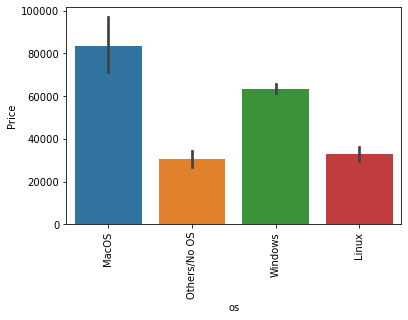

In [57]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
df.shape

(1302, 13)

<AxesSubplot:>

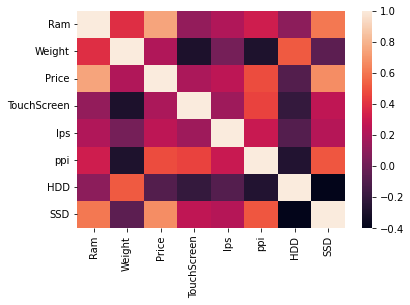

In [59]:
sns.heatmap(df.corr())

C:\Users\Aryaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

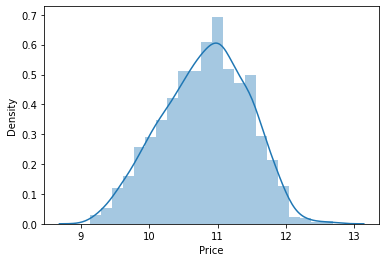

In [60]:
#### Taking log gives better accuracy and also reduces skewness
sns.distplot(np.log(df['Price']))

In [73]:
df.to_csv('Cleaned_data.csv')

In [61]:
######### Machine Learning Model

In [62]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [64]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [66]:
########### Linear Regression
# ohe = OneHotEncoder()
# ohe.fit(X[['Company','TypeName','Cpu Brand','Gpu Brand','os']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Cpu Brand','Gpu Brand','os']),remainder='passthrough')
# lr = LinearRegression()
# pipe = make_pipeline(column_trans,lr)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('r2_score: ',r2_score(y_test,y_pred))
# print('mean absolute error: ',mean_absolute_error(y_test,y_pred))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),
                ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('mean absolute error: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.806525003828223
mean absolute error:  0.21008596528165133


In [67]:
######## Ridge Regression
# ohe = OneHotEncoder()
# ohe.fit(X[['Company','TypeName','Cpu Brand','Gpu Brand','os']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Cpu Brand','Gpu Brand','os']),remainder='passthrough')
# lr = Ridge(alpha=10)
# pipe = make_pipeline(column_trans,lr)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('r2_score: ',r2_score(y_test,y_pred))
# print('mean absolute error: ',mean_absolute_error(y_test,y_pred))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = Ridge(alpha=10)
pipe = Pipeline([('step1',step1),
                ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('mean absolute error: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8124480136844796
mean absolute error:  0.20902727466654444


In [68]:
######## Lasso Regression
# ohe = OneHotEncoder()
# ohe.fit(X[['Company','TypeName','Cpu Brand','Gpu Brand','os']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Cpu Brand','Gpu Brand','os']),remainder='passthrough')
# lr = Ridge(alpha=0.001)
# pipe = make_pipeline(column_trans,lr)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('r2_score: ',r2_score(y_test,y_pred))
# print('mean absolute error: ',mean_absolute_error(y_test,y_pred))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = Lasso(alpha=0.001)
pipe = Pipeline([('step1',step1),
                ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('mean absolute error: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8068403605765053
mean absolute error:  0.21150173462931338


In [69]:
######## KNN Regression
# ohe = OneHotEncoder()
# ohe.fit(X[['Company','TypeName','Cpu Brand','Gpu Brand','os']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Cpu Brand','Gpu Brand','os']),remainder='passthrough')
# lr = KNeighborsRegressor(n_neighbors=3)
# pipe = make_pipeline(column_trans,lr)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('r2_score: ',r2_score(y_test,y_pred))
# print('mean absolute error: ',mean_absolute_error(y_test,y_pred))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step1),
                ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('mean absolute error: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8080210715334439
mean absolute error:  0.19297902292333166


In [70]:
######## Decision Tree
# ohe = OneHotEncoder()
# ohe.fit(X[['Company','TypeName','Cpu Brand','Gpu Brand','os']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Cpu Brand','Gpu Brand','os']),remainder='passthrough')
# lr = DecisionTreeRegressor(max_depth=8)
# pipe = make_pipeline(column_trans,lr)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('r2_score: ',r2_score(y_test,y_pred))
# print('mean absolute error: ',mean_absolute_error(y_test,y_pred))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([('step1',step1),
                ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('mean absolute error: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8364742284912475
mean absolute error:  0.18350520916207702


In [71]:
######## Random Forest Regression
# ohe = OneHotEncoder()
# ohe.fit(X[['Company','TypeName','Cpu Brand','Gpu Brand','os']])
# column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company','TypeName','Cpu Brand','Gpu Brand','os']),remainder='passthrough')
# lr = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# pipe = make_pipeline(column_trans,lr)
# pipe.fit(x_train,y_train)
# y_pred = pipe.predict(x_test)
# print('r2_score: ',r2_score(y_test,y_pred))
# print('mean absolute error: ',mean_absolute_error(y_test,y_pred))
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
pipe = Pipeline([('step1',step1),
                ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('mean absolute error: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8861346481071276
mean absolute error:  0.16074757976133375


## Exporting the model

In [72]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))